In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from Model.model import VAE, RegressionNN 
from utils.trainer import RegressionTrainer
from utils.data import SignalData

In [2]:
### Load data and project data using VAE ###
device = "cuda" if torch.cuda.is_available() else "cpu"
signal_data = SignalData(csv_file="Data/TASK-ML-INTERN.csv", device = device)
signal_data.x = signal_data.project_data(mode = "PCA", n_components = 32)
signal_data.split_data()

In [3]:
embeddings = signal_data.x  
labels = signal_data.y 

# Initialize t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)


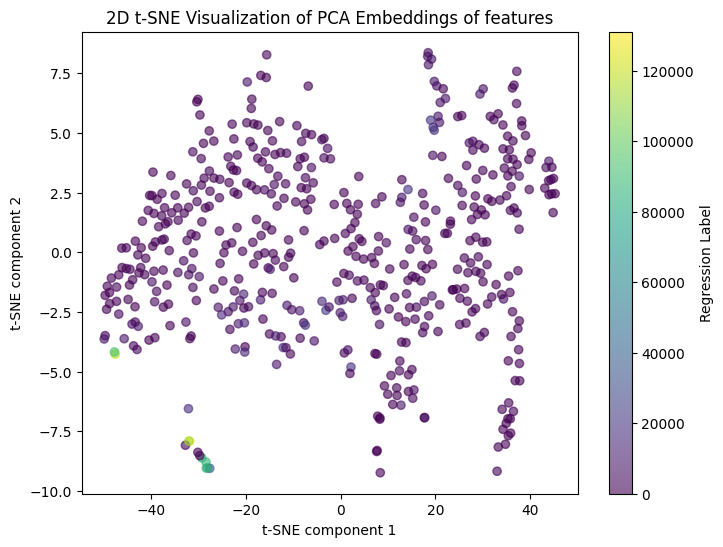

In [4]:
# Plot the embeddings in 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1],
                      c=labels, cmap='viridis', alpha=0.6)
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('2D t-SNE Visualization of PCA Embeddings of features')
cbar = plt.colorbar(scatter)
cbar.set_label('Regression Label')
plt.show()